In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.0.0-rc0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True, shuffle_files=True)
train_data, test_data = dataset['train'], dataset['test'] 

In [5]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=0.1.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    urls=['http://ai.stanford.edu/~amaas/data/sentiment/'],
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts

In [8]:
tokenizer = info.features['text'].encoder

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE, train_data.output_shapes)
test_data = test_data.padded_batch(BATCH_SIZE, test_data.output_shapes)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
NUM_EPOCHS = 10
history = model.fit(train_data, epochs=NUM_EPOCHS, validation_data=test_data)

Epoch 1/10
391/391 [==============================] - 101s 259ms/step - loss: 0.0257 - accuracy: 0.9926 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 101s 257ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.9512 - val_accuracy: 0.8451
Epoch 3/10
391/391 [==============================] - 101s 258ms/step - loss: 0.0234 - accuracy: 0.9929 - val_loss: 0.9677 - val_accuracy: 0.8465
Epoch 4/10
391/391 [==============================] - 101s 258ms/step - loss: 0.0170 - accuracy: 0.9958 - val_loss: 1.1006 - val_accuracy: 0.8453
Epoch 5/10
391/391 [==============================] - 101s 258ms/step - loss: 0.0215 - accuracy: 0.9942 - val_loss: 1.0256 - val_accuracy: 0.8470
Epoch 6/10
391/391 [==============================] - 104s 265ms/step - loss: 0.0103 - accuracy: 0.9978 - val_loss: 1.2494 - val_accuracy: 0.8480
Epoch 7/10
391/391 [==============================] - 101s 258ms/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 

In [18]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

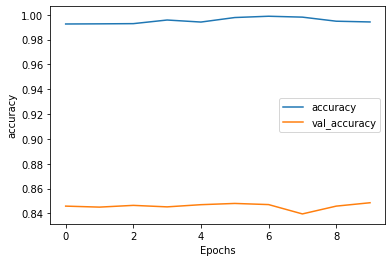

In [19]:
plot_graphs(history, 'accuracy');

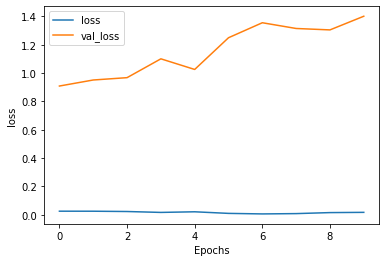

In [20]:
plot_graphs(history, 'loss');